## Laboratorio 10 - Visualización de datos - Accidentes de tránsito en Guatemala

In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from IPython.display import Image, display

### Gráfica 01: ¿Cuándo ocurren más accidentes?

In [541]:
df = pd.read_csv('data/cuadro7.csv')

In [542]:
print("Estructura del DataFrame:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())

Estructura del DataFrame:
  hora_de_ocurrencia   total  lunes  martes  miercoles  jueves  viernes  \
0              Total  8401.0   1141     970        910     981     1182   
1      00:00 a 00:59   560.0     84      51         59      59       70   
2      01:00 a 01:59   311.0     31      33         28      27       30   
3      02:00 a 02:59   233.0     28      20         20      11       28   
4      03:00 a 03:59   167.0     24      10         10      15       34   

   sabado  domingo fuente_cuadro  
0    1615     1602      cuadro 7  
1     108      129      cuadro 7  
2      72       90      cuadro 7  
3      60       66      cuadro 7  
4      26       48      cuadro 7  

Columnas disponibles:
['hora_de_ocurrencia', 'total', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'fuente_cuadro']


In [543]:
df_limpio = df[df['hora_de_ocurrencia'] != 'Total'].copy()
df_limpio = df_limpio.drop(columns=['total', 'fuente_cuadro'])

In [544]:
df_limpio = df_limpio.set_index('hora_de_ocurrencia')

In [545]:
dias_orden = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
df_limpio = df_limpio[dias_orden]

In [546]:
df_limpio = df_limpio.apply(pd.to_numeric, errors='coerce')

In [547]:
df_heatmap = df_limpio.T

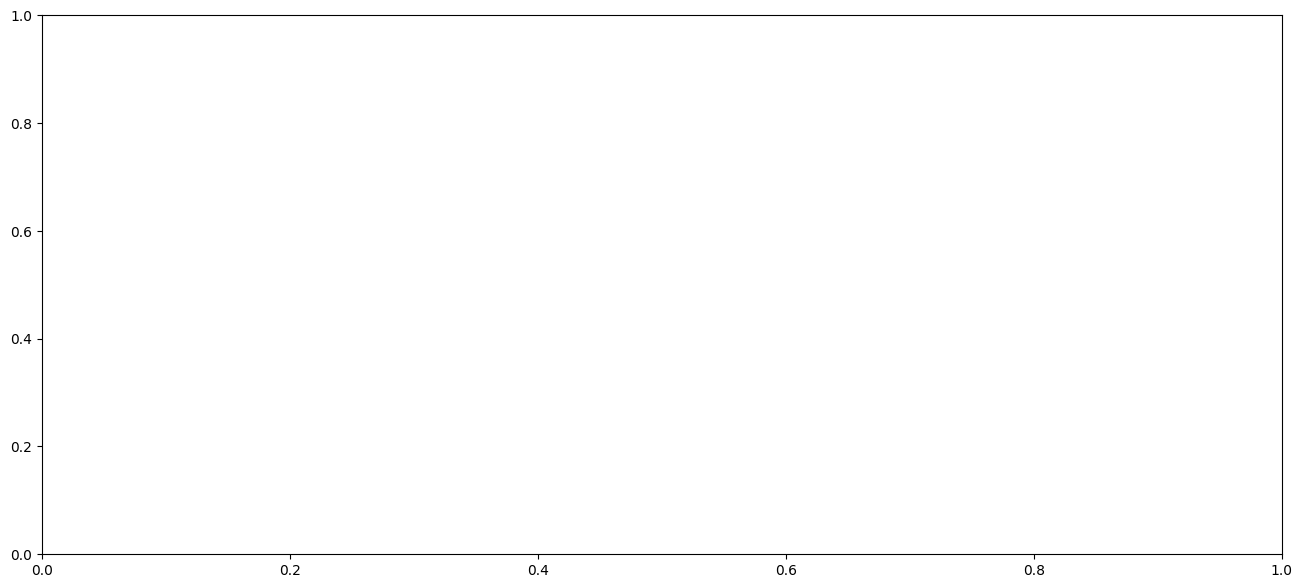

In [548]:
fig, ax = plt.subplots(figsize=(16, 7))

In [549]:
dias_español = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [550]:
ax = sns.heatmap(df_heatmap, 
                 cmap='Purples', 
                 annot=True, 
                 fmt='g',  
                 cbar_kws={'label': 'Número de Accidentes', 'shrink': 0.8},
                 linewidths=1,  
                 linecolor='white',
                 vmin=0,
                 ax=ax)  

In [551]:
ax.set_title('¿Cuándo Ocurren Más Accidentes de Tránsito en Guatemala?\nDistribución por Día de la Semana y Hora del Día - Año 2024',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Hora del Día', fontsize=13, fontweight='bold')
ax.set_ylabel('Día de la Semana', fontsize=13, fontweight='bold')

Text(170.72222222222223, 0.5, 'Día de la Semana')

In [552]:
ax.set_yticklabels(dias_español, rotation=0, fontsize=11)

[Text(0, 0.5, 'Lunes'),
 Text(0, 1.5, 'Martes'),
 Text(0, 2.5, 'Miércoles'),
 Text(0, 3.5, 'Jueves'),
 Text(0, 4.5, 'Viernes'),
 Text(0, 5.5, 'Sábado'),
 Text(0, 6.5, 'Domingo')]

In [553]:
horas_etiquetas = [hora.split(' a ')[0] for hora in df_heatmap.columns]
ax.set_xticklabels(horas_etiquetas, rotation=45, ha='right', fontsize=9)

[Text(0.5, 0, '00:00'),
 Text(1.5, 0, '01:00'),
 Text(2.5, 0, '02:00'),
 Text(3.5, 0, '03:00'),
 Text(4.5, 0, '04:00'),
 Text(5.5, 0, '05:00'),
 Text(6.5, 0, '06:00'),
 Text(7.5, 0, '07:00'),
 Text(8.5, 0, '08:00'),
 Text(9.5, 0, '09:00'),
 Text(10.5, 0, '10:00'),
 Text(11.5, 0, '11:00'),
 Text(12.5, 0, '12:00'),
 Text(13.5, 0, '13:00'),
 Text(14.5, 0, '14:00'),
 Text(15.5, 0, '15:00'),
 Text(16.5, 0, '16:00'),
 Text(17.5, 0, '17:00'),
 Text(18.5, 0, '18:00'),
 Text(19.5, 0, '19:00'),
 Text(20.5, 0, '20:00'),
 Text(21.5, 0, '21:00'),
 Text(22.5, 0, '22:00'),
 Text(23.5, 0, '23:00'),
 Text(24.5, 0, 'Ignorada')]

In [554]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [555]:
fig.savefig('grafico1_heatmap_accidentes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

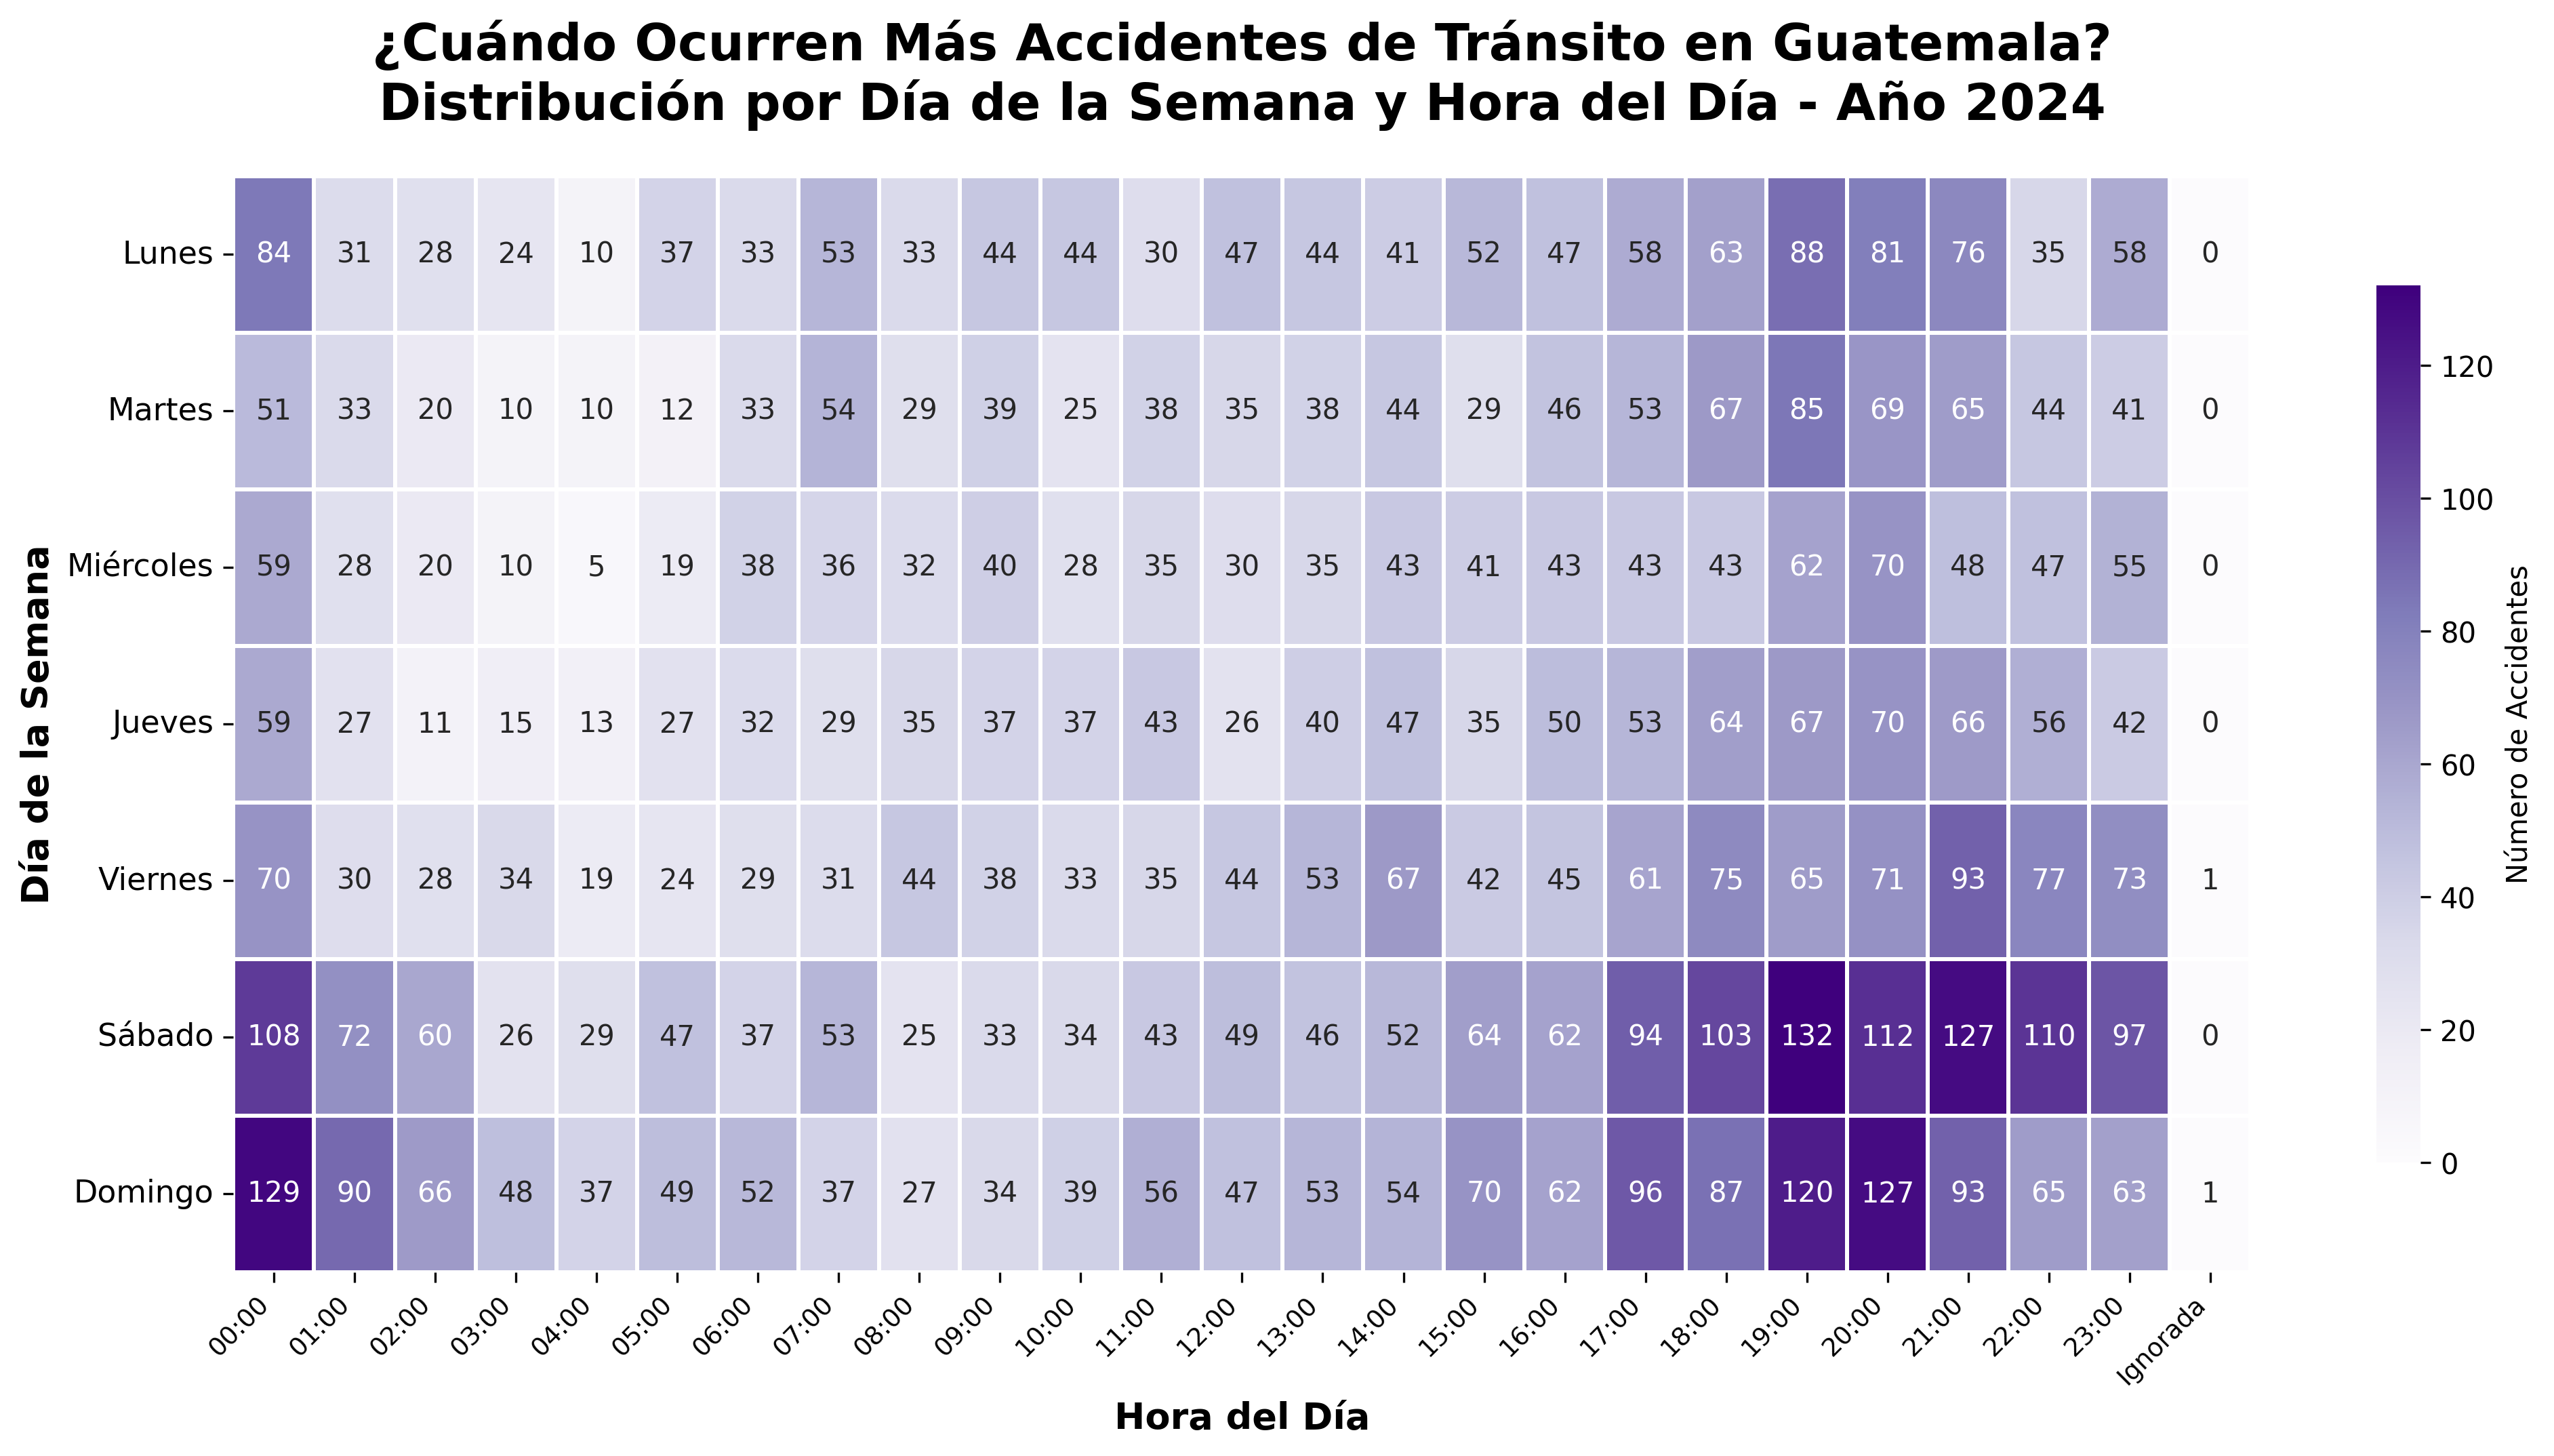

In [556]:
display(Image('grafico1_heatmap_accidentes.png'))

### Gráfica 02: Los Departamentos Más Peligrosos

In [557]:
df = pd.read_csv('data/cuadro1.csv')

In [558]:
print("Estructura del DataFrame:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())

Estructura del DataFrame:
    departamento    2020    2021    2022    2023    2024 fuente_cuadro
0          Total  6350.0  8153.0  7924.0  8218.0  8401.0      cuadro 1
1      Guatemala  2676.0  3450.0  3387.0  3457.0  3408.0      cuadro 1
2    El Progreso   124.0   170.0   147.0   173.0   182.0      cuadro 1
3   Sacatepéquez   202.0   270.0   325.0   325.0   366.0      cuadro 1
4  Chimaltenango   229.0   297.0   297.0   300.0   299.0      cuadro 1

Columnas disponibles:
['departamento', '2020', '2021', '2022', '2023', '2024', 'fuente_cuadro']


In [559]:
df_limpio = df[df['departamento'] != 'Total'].copy()
df_limpio = df_limpio.drop(columns=['fuente_cuadro'])

In [560]:
for year in ['2020', '2021', '2022', '2023', '2024']:
    df_limpio[year] = pd.to_numeric(df_limpio[year], errors='coerce')

In [561]:
df_top10 = df_limpio.nlargest(10, '2024').copy()

In [562]:
df_top10['cambio'] = df_top10['2024'] - df_top10['2023']
df_top10['cambio_pct'] = (df_top10['cambio'] / df_top10['2023'] * 100)

In [563]:
df_top10 = df_top10.sort_values('2024', ascending=True)

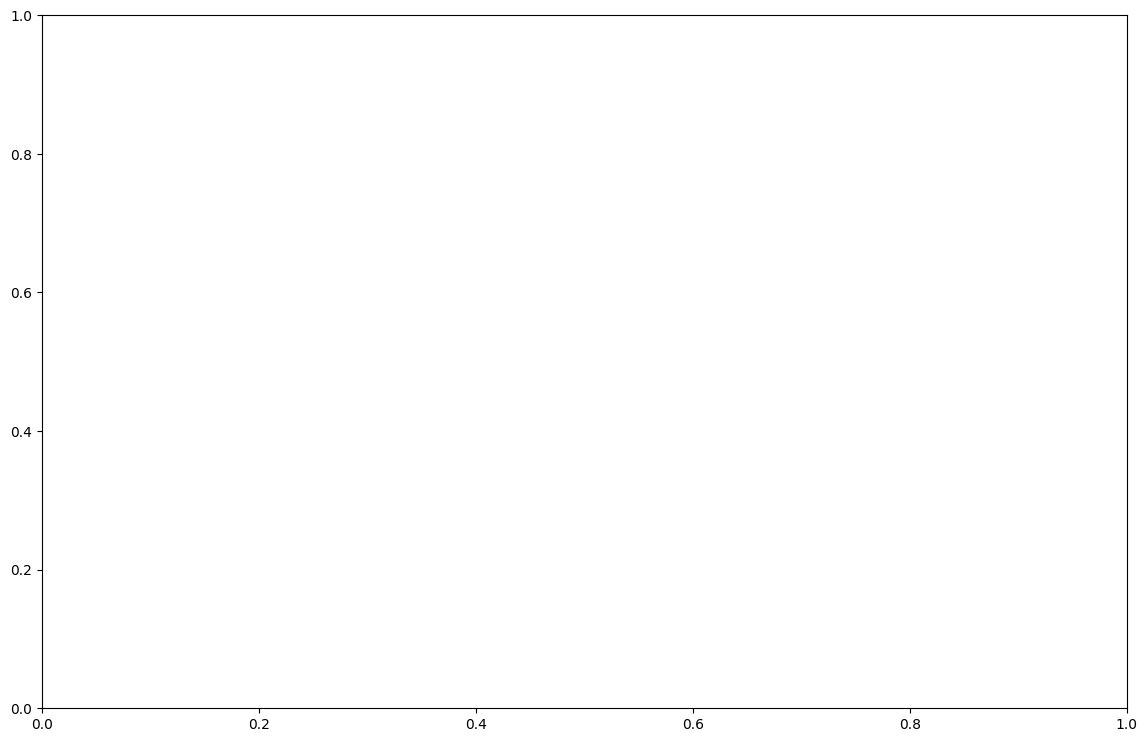

In [564]:
fig, ax = plt.subplots(figsize=(14, 9))

In [565]:
y_pos = np.arange(len(df_top10))
bar_height = 0.35

In [566]:
bars1 = ax.barh(y_pos + bar_height/2, df_top10['2024'], bar_height, 
                label='2024', color='#450b82', alpha=0.85, edgecolor='black', linewidth=1)
bars2 = ax.barh(y_pos - bar_height/2, df_top10['2023'], bar_height, 
                label='2023', color='#7669af', alpha=0.7, edgecolor='black', linewidth=1)

In [567]:
for i, (idx, row) in enumerate(df_top10.iterrows()):

    # Valor 2024
    ax.text(row['2024'] + 30, i + bar_height/2, f"{int(row['2024'])}", 
            va='center', fontsize=10, color='#1e1e1e', fontweight='bold')
    
    # Valor 2023
    ax.text(row['2023'] + 30, i - bar_height/2, f"{int(row['2023'])}", 
            va='center', fontsize=10, color='#1e1e1e', fontweight='bold')
    
    # Flecha de cambio
    if row['cambio'] > 0:
        simbolo = '▲'
        color_flecha = '#420680'
        texto = f"{simbolo} +{abs(int(row['cambio']))}"
    elif row['cambio'] < 0:
        simbolo = '▼'
        color_flecha = '#7669af'
        texto = f"{simbolo} -{abs(int(row['cambio']))}"
    else:
        simbolo = '='
        color_flecha = '#bebfdd'
        texto = f"{simbolo} 0"
    
    ax.text(max(row['2024'], row['2023']) + 200, i, texto, 
            va='center', fontsize=10, color=color_flecha, fontweight='bold')

In [568]:
ax.set_yticks(y_pos)
ax.set_yticklabels(df_top10['departamento'], fontsize=11)
ax.set_xlabel('Número de Accidentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Departamento', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Departamentos con Más Accidentes de Tránsito\nComparación 2023 vs 2024 - Guatemala', 
             fontsize=16, fontweight='bold', pad=20)

Text(0.5, 1.0, 'Top 10 Departamentos con Más Accidentes de Tránsito\nComparación 2023 vs 2024 - Guatemala')

In [569]:
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

In [570]:
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)

In [571]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [572]:
fig.savefig('grafico2_departamentos_peligrosos.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

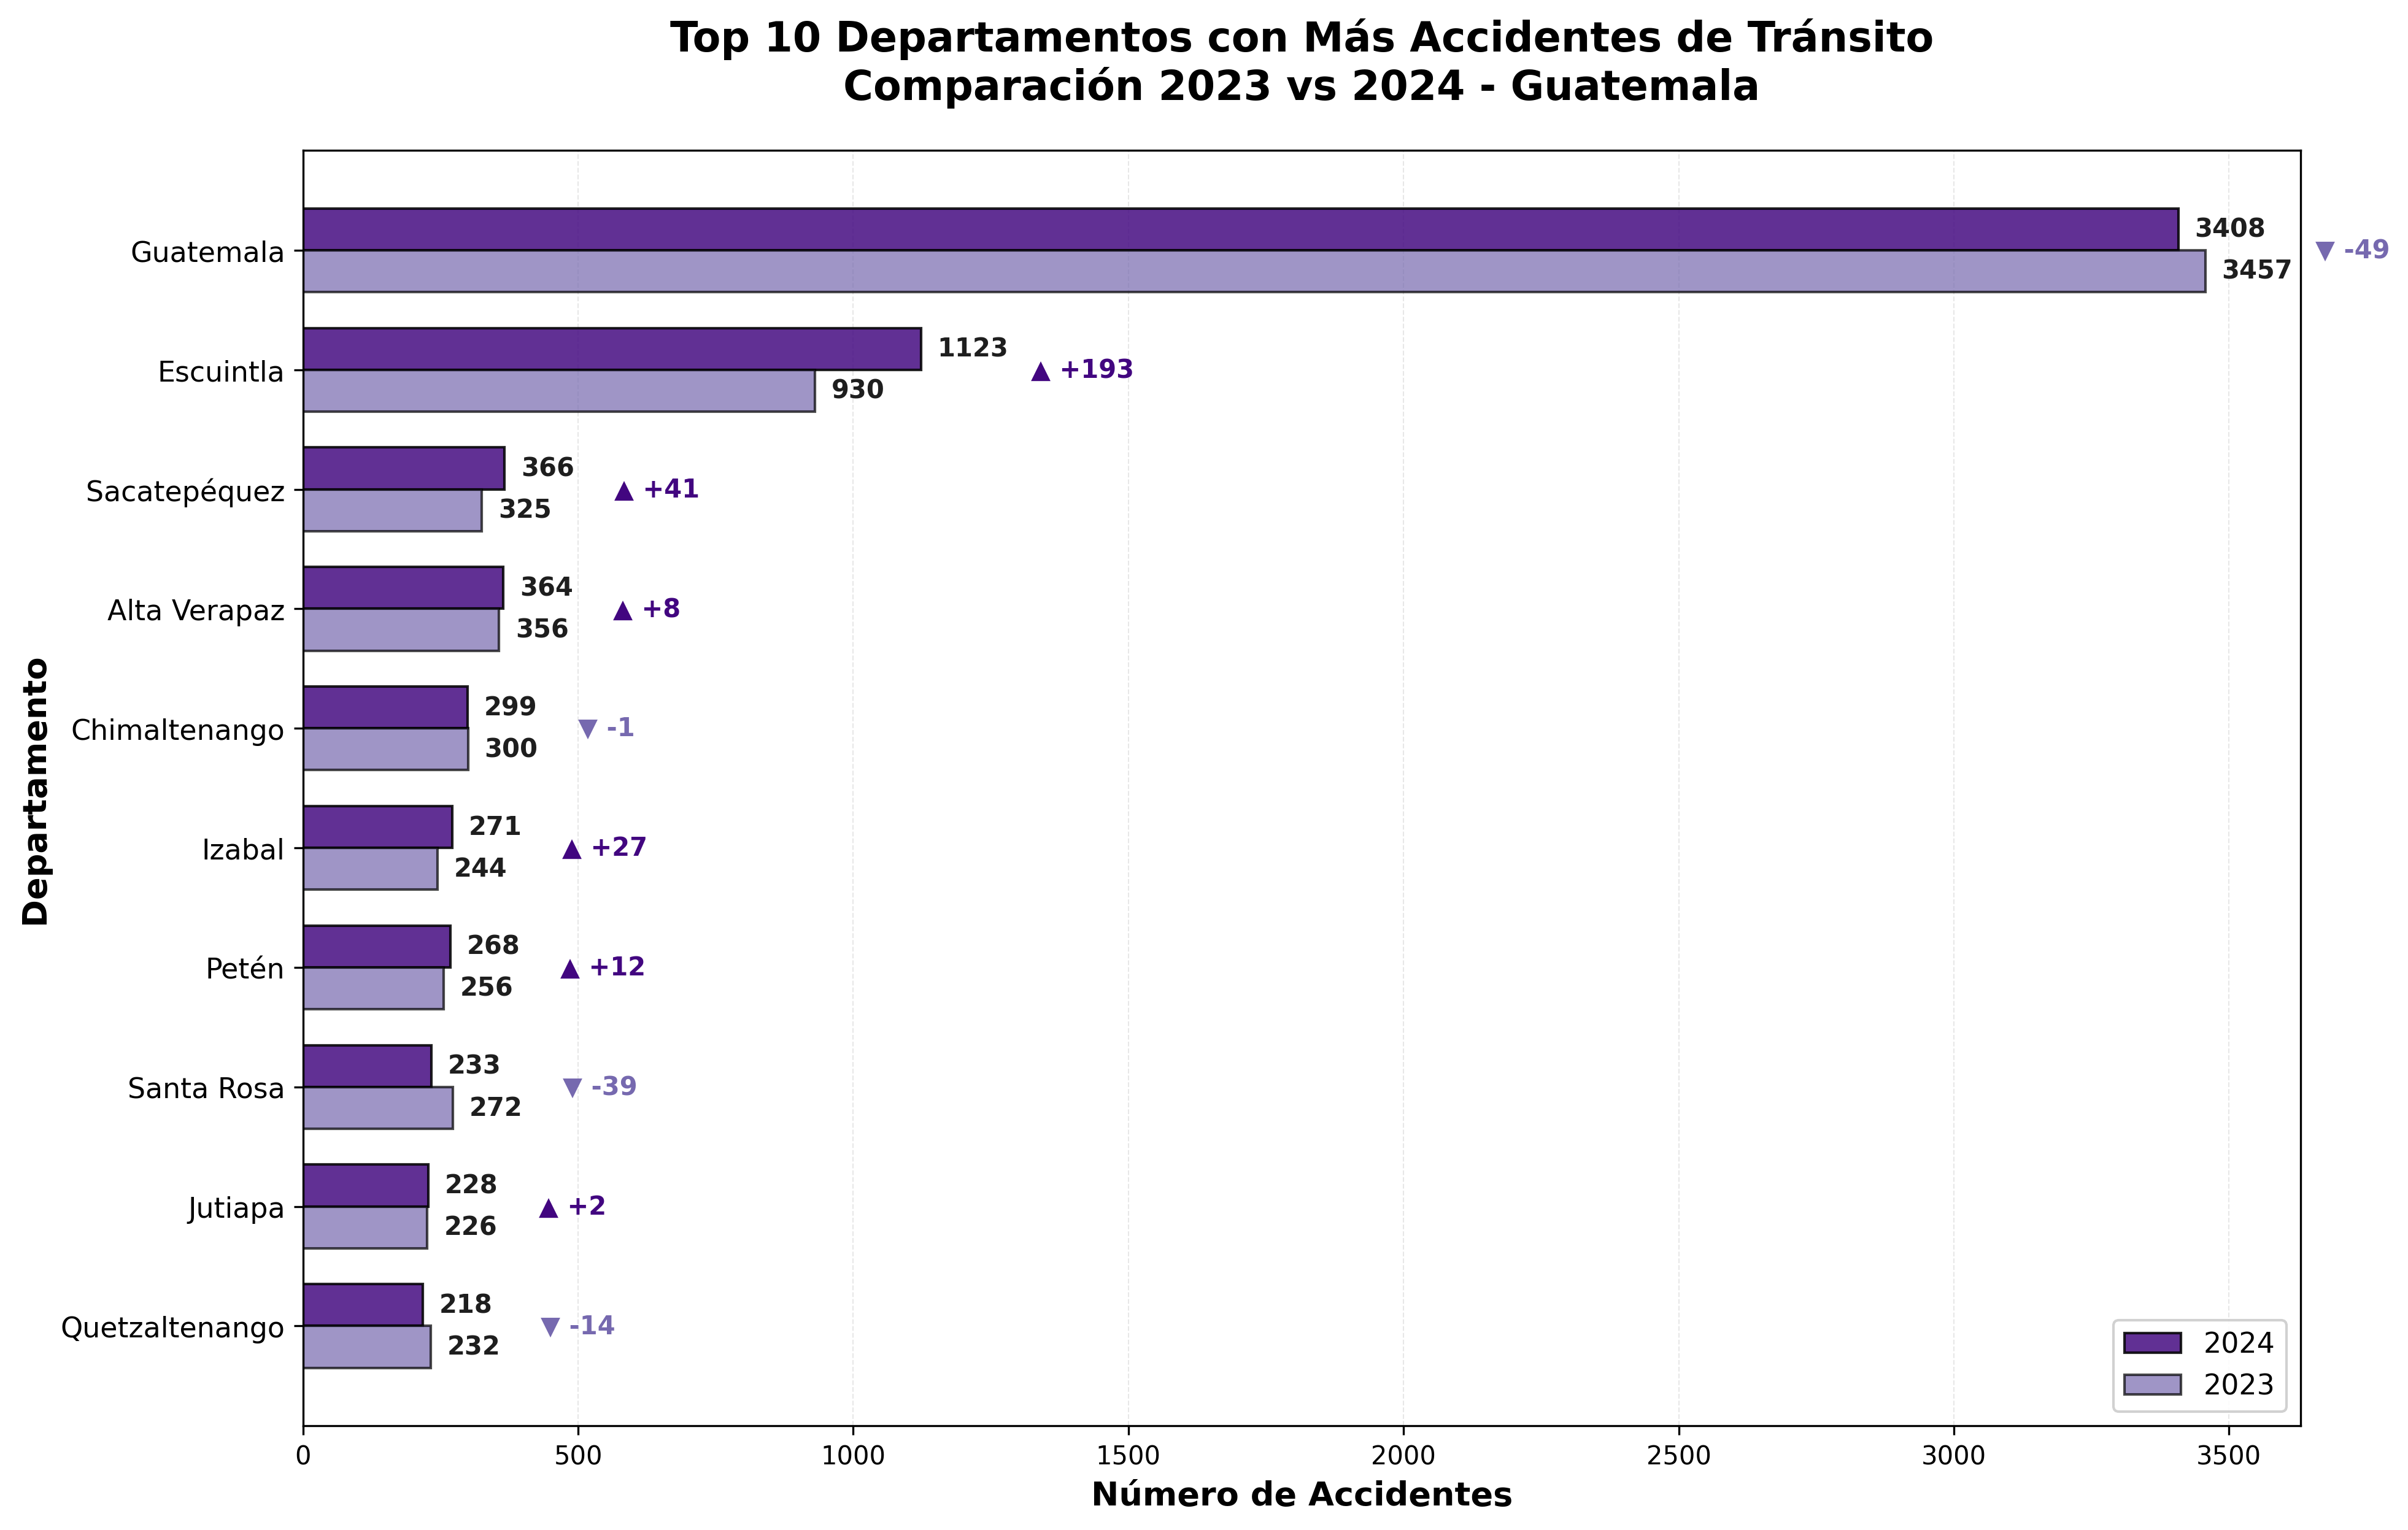

In [573]:
display(Image('grafico2_departamentos_peligrosos.png'))

### Gráfica 03: Tipos de Accidentes Más Comunes

In [574]:
df = pd.read_csv('data/cuadro8.csv')

In [575]:
print("Estructura del DataFrame:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())

Estructura del DataFrame:
    departamento   total  colision  atropello  derrape  choque  vuelco  \
0          Total  8401.0      4513       2073     1192     401     143   
1      Guatemala  3408.0      1846        852      530     147      24   
2    El Progreso   182.0       113         27       19      14       6   
3   Sacatepéquez   366.0       201         76       64      14       4   
4  Chimaltenango   299.0       138        111       31      14       2   

   embarranco  encuneto  caida  ignorado fuente_cuadro  
0          73         3      1         2      cuadro 8  
1           7         0      1         1      cuadro 8  
2           3         0      0         0      cuadro 8  
3           7         0      0         0      cuadro 8  
4           3         0      0         0      cuadro 8  

Columnas disponibles:
['departamento', 'total', 'colision', 'atropello', 'derrape', 'choque', 'vuelco', 'embarranco', 'encuneto', 'caida', 'ignorado', 'fuente_cuadro']


In [576]:
df_limpio = df[df['departamento'] != 'Total'].copy()
df_limpio = df_limpio.drop(columns=['fuente_cuadro'])

In [577]:
tipos_accidente = ['colision', 'atropello', 'derrape', 'choque', 'vuelco', 'embarranco', 'encuneto', 'caida', 'ignorado']
for tipo in tipos_accidente + ['total']:
    df_limpio[tipo] = pd.to_numeric(df_limpio[tipo], errors='coerce')

In [578]:
df_top10 = df_limpio.nlargest(10, 'total').copy()

In [579]:
for tipo in tipos_accidente:
    df_top10[f'{tipo}_pct'] = (df_top10[tipo] / df_top10['total'] * 100)

In [580]:
df_top10 = df_top10.sort_values('total', ascending=True)

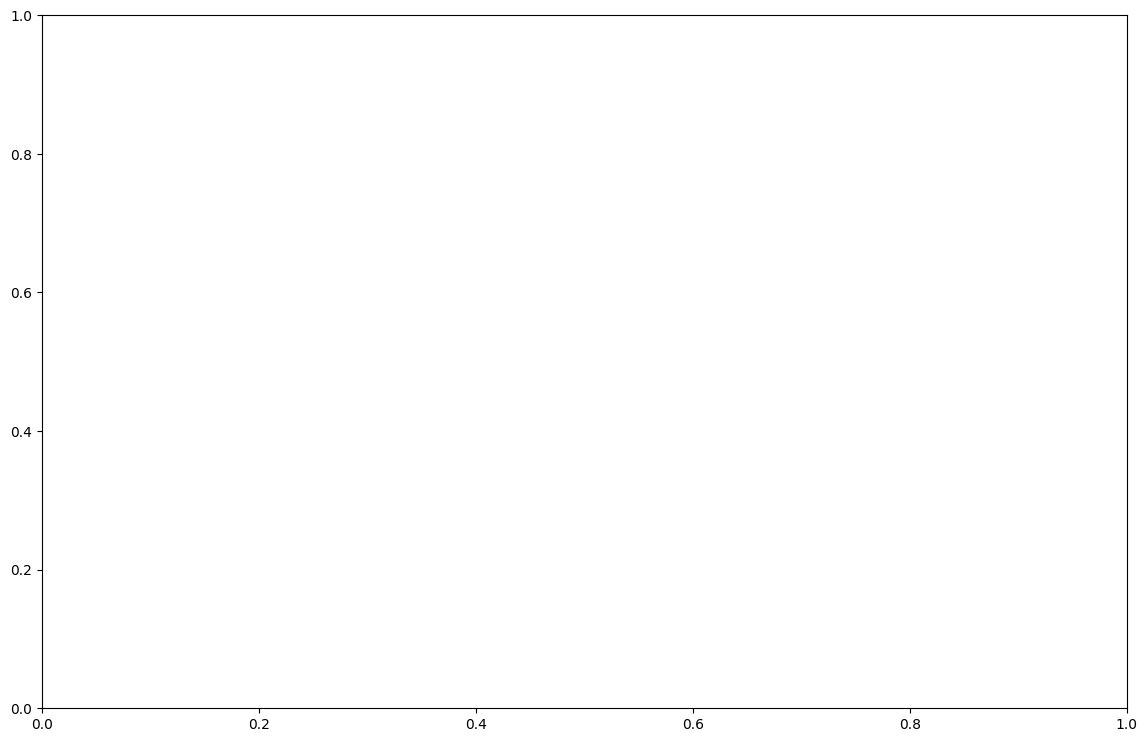

In [581]:
fig, ax = plt.subplots(figsize=(14, 9))

In [ ]:
colores = {
    'colision':   '#420680',  
    'atropello':  '#705eaa', 
    'derrape':    '#BB8FCE',  
    'choque':     '#5DADE2',  
    'vuelco':     '#48C9B0', 
    'embarranco': '#6A0DAD',  
    'encuneto':   '#D2B4DE',  
    'caida':      '#3498DB',  
    'ignorado':   '#cacae3'  
}

In [583]:
y_pos = np.arange(len(df_top10))
left = np.zeros(len(df_top10))

In [584]:
tipos_significativos = []
for tipo in tipos_accidente:
    if df_top10[f'{tipo}_pct'].mean() > 0.5:  
        tipos_significativos.append(tipo)

In [585]:
barras = {}
for tipo in tipos_significativos:
    barras[tipo] = ax.barh(y_pos, df_top10[f'{tipo}_pct'], left=left, 
                           label=tipo.capitalize(), color=colores[tipo], 
                           edgecolor='white', linewidth=1.5)
    left += df_top10[f'{tipo}_pct']

In [586]:
for tipo in tipos_significativos:
    for i, (idx, row) in enumerate(df_top10.iterrows()):
        porcentaje = row[f'{tipo}_pct']
        if porcentaje > 10: 
            pos_x = row[[f'{t}_pct' for t in tipos_significativos if tipos_significativos.index(t) < tipos_significativos.index(tipo)]].sum() + porcentaje/2
            ax.text(pos_x, i, f'{porcentaje:.0f}%', 
                   va='center', ha='center', fontsize=9, 
                   color='white', fontweight='bold')

In [587]:
ax.set_yticks(y_pos)
ax.set_yticklabels(df_top10['departamento'], fontsize=11)
ax.set_xlabel('Porcentaje del Total de Accidentes (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Departamento', fontsize=13, fontweight='bold')
ax.set_title('Composición de Tipos de Accidentes por Departamento\nTop 10 Departamentos - Guatemala 2024', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 100)

(0.0, 100.0)

In [588]:
ax.legend(loc='lower right', fontsize=10, framealpha=0.95, ncol=2)

In [589]:
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [590]:
fig.savefig('grafico3_tipos_accidentes_departamentos.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

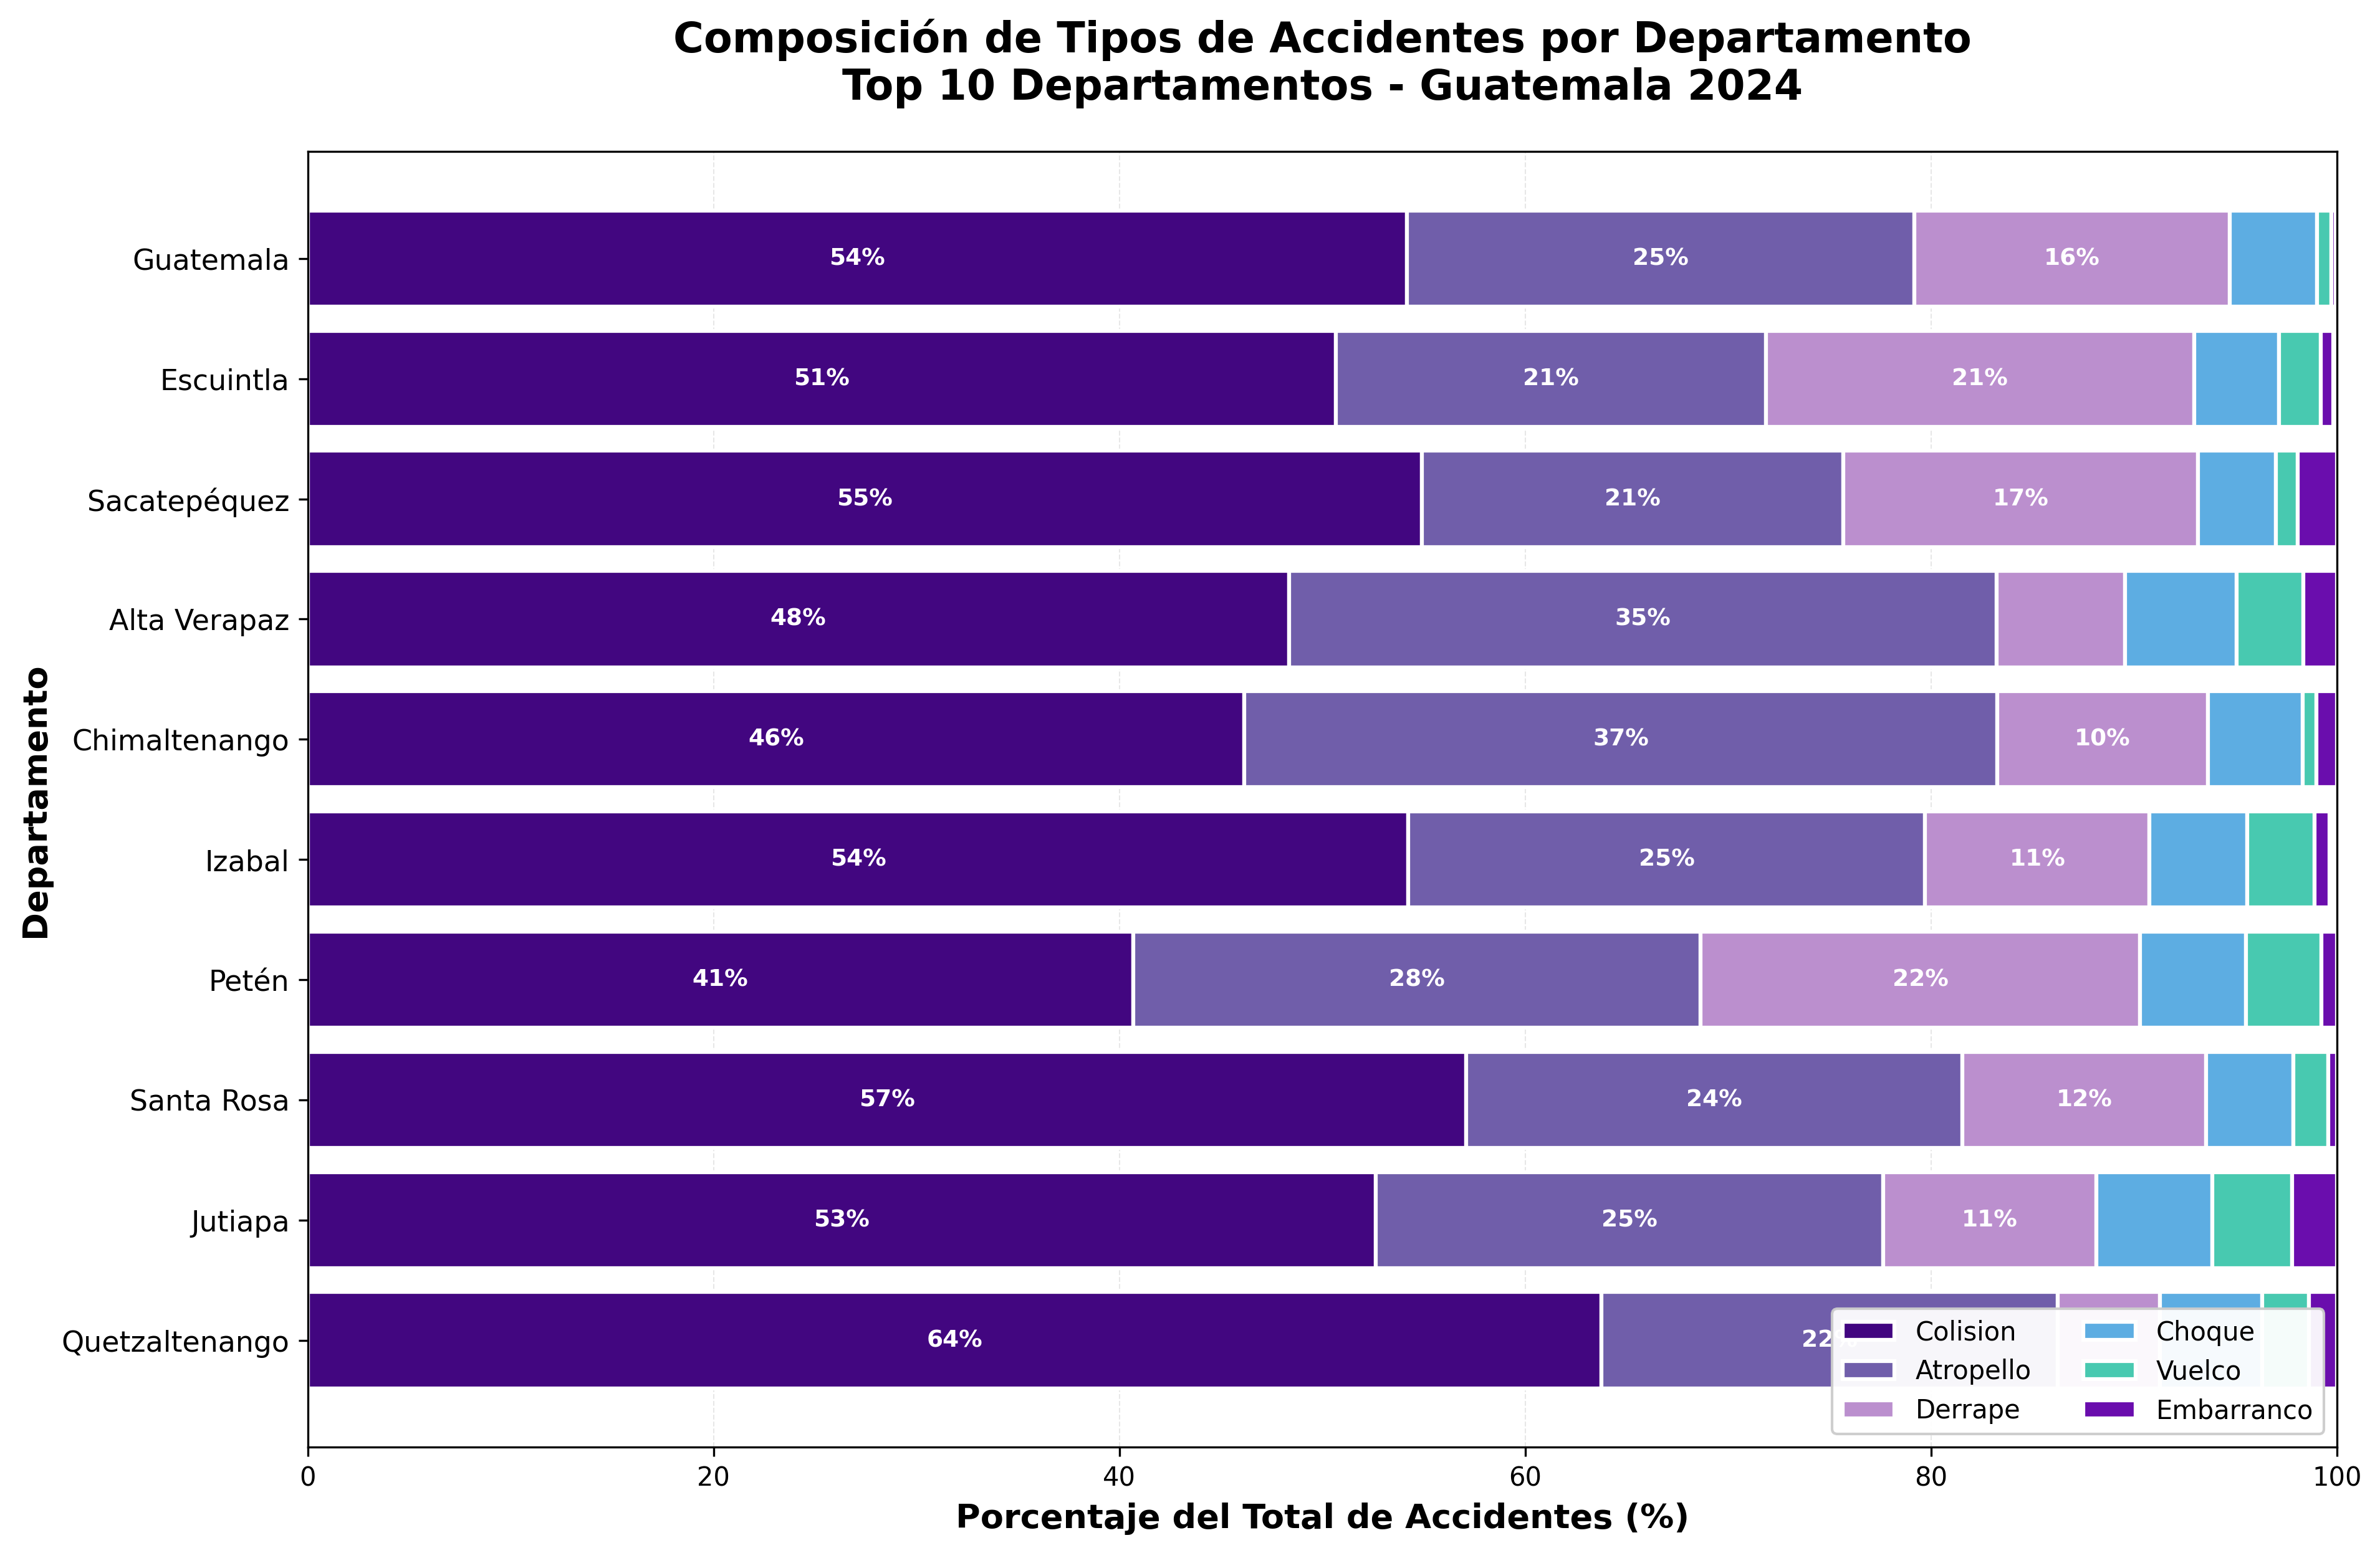

In [591]:
display(Image('grafico3_tipos_accidentes_departamentos.png'))

### Gráfica 04: Perfil del Conductor

In [607]:
nombres_columnas = [
    'grupos_edad',
    'total_general',
    'hombres_total', 'mujeres_total', 'ignorado_total',
    'no_ebrio_total', 'no_ebrio_hombres', 'no_ebrio_mujeres', 'no_ebrio_ignorado',
    'ebrio_total', 'ebrio_hombres', 'ebrio_mujeres',
    'ignorado_cond_total', 'ignorado_cond_hombres', 'ignorado_cond_mujeres', 'ignorado_cond_estado',
    'fuente_cuadro'
]

In [608]:
df = pd.read_csv('data/cuadro26.csv', skiprows=1, names=nombres_columnas)

In [609]:
print("Columnas del DataFrame:")
print(df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

Columnas del DataFrame:
['grupos_edad', 'total_general', 'hombres_total', 'mujeres_total', 'ignorado_total', 'no_ebrio_total', 'no_ebrio_hombres', 'no_ebrio_mujeres', 'no_ebrio_ignorado', 'ebrio_total', 'ebrio_hombres', 'ebrio_mujeres', 'ignorado_cond_total', 'ignorado_cond_hombres', 'ignorado_cond_mujeres', 'ignorado_cond_estado', 'fuente_cuadro']

Primeras filas:
   grupos_edad  total_general  hombres_total  mujeres_total  ignorado_total  \
0        Total        13045.0        11751.0          983.0           311.0   
1  Menor de 15           59.0           50.0            9.0             0.0   
2      15 - 19          986.0          906.0           79.0             1.0   
3      20 - 24         1955.0         1797.0          157.0             1.0   
4      25 - 29         1785.0         1608.0          177.0             0.0   

   no_ebrio_total  no_ebrio_hombres  no_ebrio_mujeres  no_ebrio_ignorado  \
0             505               444                60                  1   
1    

In [610]:
df_limpio = df[df['grupos_edad'] != 'Total'].copy()
df_limpio = df_limpio.drop(columns=['fuente_cuadro'])

In [611]:
df_limpio = df_limpio[df_limpio['grupos_edad'] != 'Ignorado'].copy()

In [612]:
columnas_numericas = [col for col in df_limpio.columns if col != 'grupos_edad']
for col in columnas_numericas:
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

In [613]:
print("Datos procesados:")
print(df_limpio[['grupos_edad', 'total_general', 'hombres_total', 'mujeres_total']].head(10))

Datos procesados:
    grupos_edad  total_general  hombres_total  mujeres_total
1   Menor de 15           59.0           50.0            9.0
2       15 - 19          986.0          906.0           79.0
3       20 - 24         1955.0         1797.0          157.0
4       25 - 29         1785.0         1608.0          177.0
5       30 - 34         1489.0         1331.0          157.0
6       35 - 39         1049.0          949.0           99.0
7       40 - 44          850.0          773.0           77.0
8       45 - 49          617.0          548.0           69.0
9       50 - 54          428.0          404.0           24.0
10      55 - 59          260.0          238.0           22.0


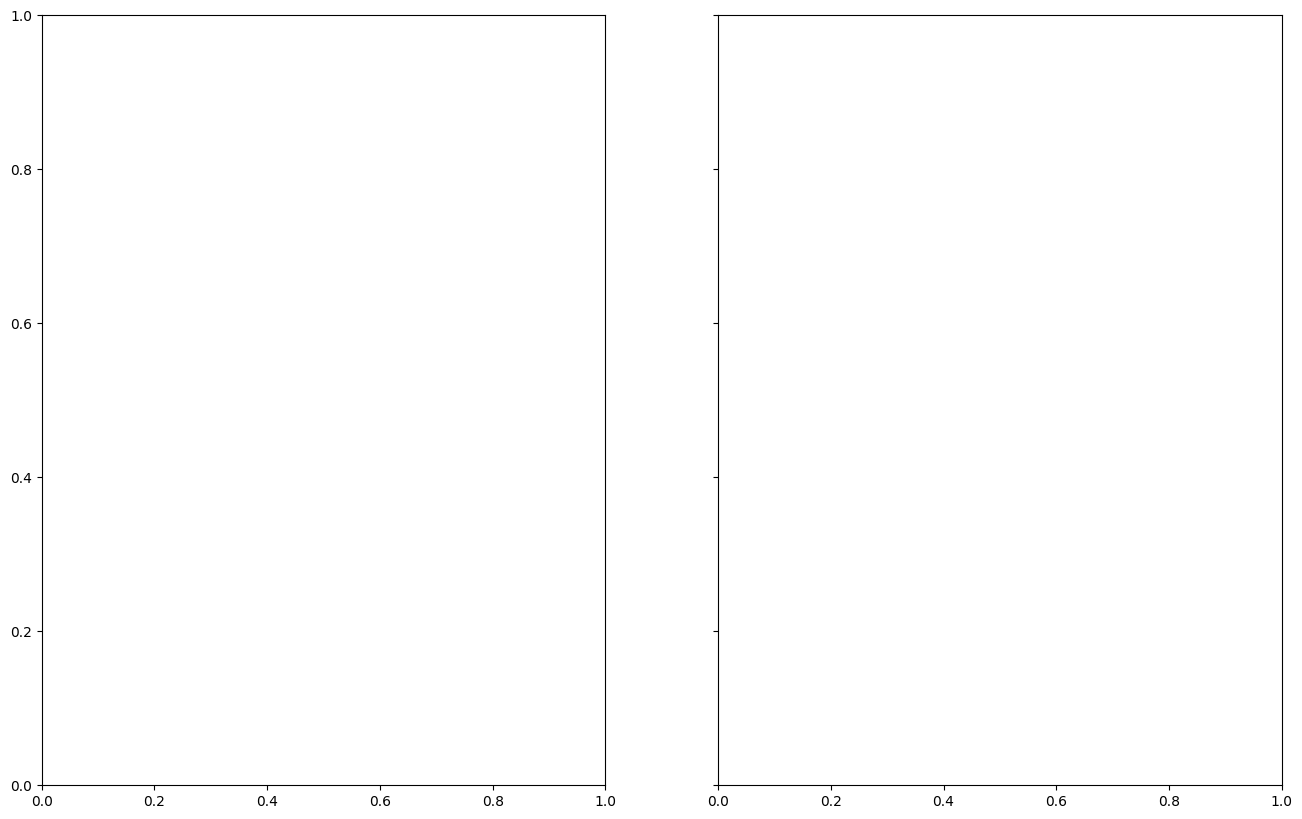

In [614]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

In [615]:
df_viz = df_limpio.sort_values('grupos_edad', ascending=False).copy()

In [616]:
y_pos = np.arange(len(df_viz))

#### Gráfico por distribución por sexo

In [617]:
ax1.barh(y_pos, -df_viz['hombres_total'], color='#3498db', alpha=0.8, label='Hombres', edgecolor='black', linewidth=1)
ax1.barh(y_pos, df_viz['mujeres_total'], color='#5e3a98', alpha=0.8, label='Mujeres', edgecolor='black', linewidth=1)

<BarContainer object of 15 artists>

In [618]:
for i, (idx, row) in enumerate(df_viz.iterrows()):
    # Hombres (lado izquierdo)
    ax1.text(-row['hombres_total'] - 30, i, f"{int(row['hombres_total'])}", 
             va='center', ha='right', fontsize=9, fontweight='bold', color='#3498db')
    # Mujeres (lado derecho)
    ax1.text(row['mujeres_total'] + 30, i, f"{int(row['mujeres_total'])}", 
             va='center', ha='left', fontsize=9, fontweight='bold', color='#5e3a98')

ax1.set_yticks(y_pos)
ax1.set_yticklabels(df_viz['grupos_edad'], fontsize=11)
ax1.set_xlabel('Número de Conductores', fontsize=12, fontweight='bold')
ax1.set_title('Distribución por Sexo', fontsize=14, fontweight='bold', pad=15)
ax1.axvline(0, color='black', linewidth=1.5)
ax1.legend(loc='upper right', fontsize=11)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

In [619]:
max_val = max(df_viz['hombres_total'].max(), df_viz['mujeres_total'].max())
ax1.set_xlim(-max_val * 1.15, max_val * 1.15)

ax1.set_xticklabels([abs(int(x)) for x in ax1.get_xticks()])

C:\Users\ncast\AppData\Local\Temp\ipykernel_4804\2103753919.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([abs(int(x)) for x in ax1.get_xticks()])


[Text(-2500.0, 0, '2500'),
 Text(-2000.0, 0, '2000'),
 Text(-1500.0, 0, '1500'),
 Text(-1000.0, 0, '1000'),
 Text(-500.0, 0, '500'),
 Text(0.0, 0, '0'),
 Text(500.0, 0, '500'),
 Text(1000.0, 0, '1000'),
 Text(1500.0, 0, '1500'),
 Text(2000.0, 0, '2000'),
 Text(2500.0, 0, '2500')]

#### Gráfico por condición del conductor (Ebrio vs No ebrio)

In [620]:
df_viz['pct_no_ebrio'] = (df_viz['no_ebrio_total'] / df_viz['total_general'] * 100)
df_viz['pct_ebrio'] = (df_viz['ebrio_total'] / df_viz['total_general'] * 100)
df_viz['pct_ignorado'] = (df_viz['ignorado_cond_total'] / df_viz['total_general'] * 100)

In [621]:
left = np.zeros(len(df_viz))

bar1 = ax2.barh(y_pos, df_viz['pct_no_ebrio'], left=left, 
                color='#9793c5', alpha=0.85, label='No Ebrio', edgecolor='white', linewidth=1.5)
left += df_viz['pct_no_ebrio']

bar2 = ax2.barh(y_pos, df_viz['pct_ebrio'], left=left, 
                color='#420680', alpha=0.85, label='Ebrio', edgecolor='white', linewidth=1.5)
left += df_viz['pct_ebrio']

bar3 = ax2.barh(y_pos, df_viz['pct_ignorado'], left=left, 
                color='#dfdfed', alpha=0.7, label='Ignorado', edgecolor='white', linewidth=1.5)

In [622]:
for i, (idx, row) in enumerate(df_viz.iterrows()):
    # No ebrio
    if row['pct_no_ebrio'] > 5:
        ax2.text(row['pct_no_ebrio']/2, i, f"{row['pct_no_ebrio']:.0f}%", 
                va='center', ha='center', fontsize=9, color='white', fontweight='bold')
    # Ebrio
    if row['pct_ebrio'] > 5:
        ax2.text(row['pct_no_ebrio'] + row['pct_ebrio']/2, i, f"{row['pct_ebrio']:.0f}%", 
                va='center', ha='center', fontsize=9, color='white', fontweight='bold')

ax2.set_xlabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax2.set_title('Condición del Conductor', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlim(0, 100)
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

In [623]:
fig.suptitle('Perfil de Conductores Involucrados en Accidentes de Tránsito\nPor Grupos de Edad - Guatemala 2024', 
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [624]:
fig.savefig('grafico4_perfil_conductores.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

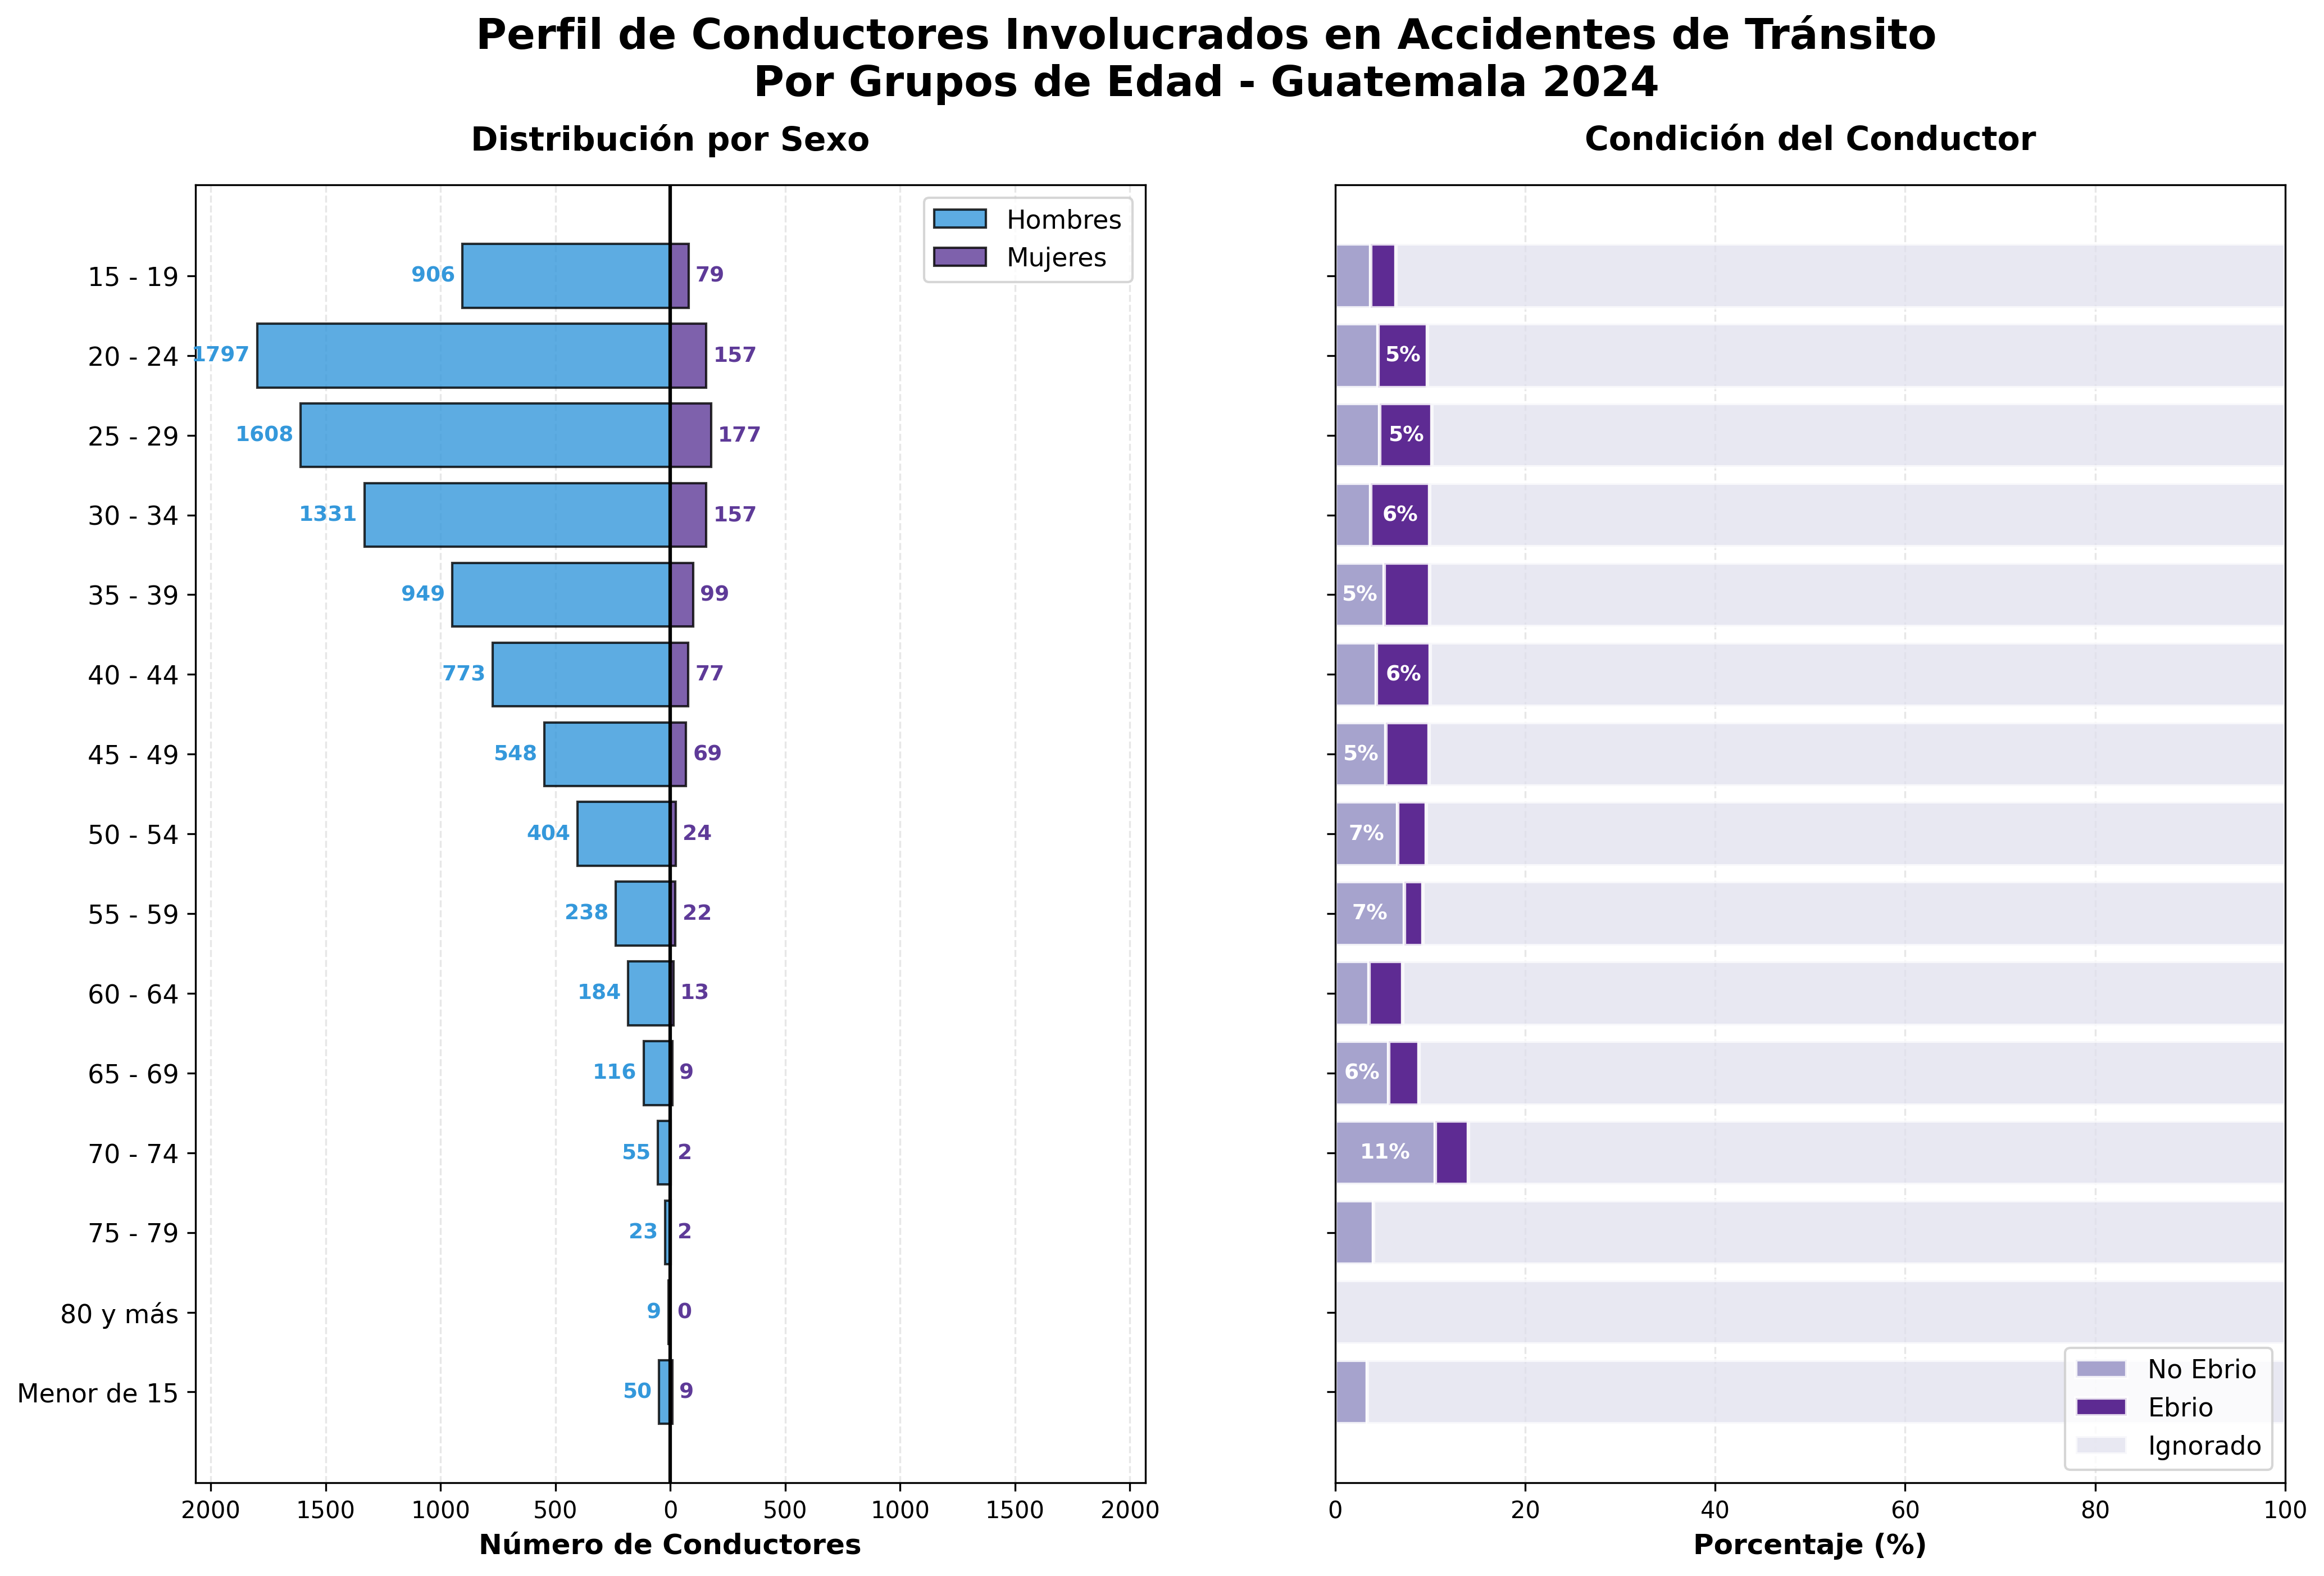

In [625]:
display(Image('grafico4_perfil_conductores.png'))

### Gráfica 05: Gravedad del accidente 

### Gráfica 06: Cantidad de accidentes por atropello 

### Gráfica 07: Zona de Riesgo en Ciudad de Guatemala

### Gráfico 08: ¿Quién choca más? 